extrapolate data for each data series and append NOC values to the nations


In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [35]:
# Load
noc_labels = pd.read_csv('../data/noc_countries.csv')

economicData = pd.read_csv('../data/Economic/Data.csv')
economicData = economicData.assign(**{'2024': np.nan})
economicData = pd.merge(economicData, noc_labels,
                        left_on='Country Name', right_on='country', how='left')
economicData.drop(columns=['country', 'Country Name',
                  'Country Code', 'Series Name'], inplace=True)
economicData.rename(columns=lambda x: x.split(' ')[0], inplace=True)

for col in economicData.columns[1:-1]:  # Skip 'Series' and 'noc' columns
    economicData[col] = pd.to_numeric(economicData[col], errors='coerce')

economicData

,Series,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,noc
0,NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,1.532523e+10,NaN,NaN,AFG
1,NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,-2.073884e+01,-6.240172e+00,NaN,NaN,AFG
2,EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,NaN,NaN,AFG
3,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,NaN,NaN,AFG
4,SP.POP.GROW,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,2.253524,2.292638,2.347351,...,2.581549e+00,2.866492e+00,2.885208e+00,2.908529e+00,3.134747e+00,2.851358e+00,2.534498e+00,2.665628,NaN,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
rows = economicData.iloc[:, 1:-1]
rows

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,1.532523e+10,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.451315e+00,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,-2.073884e+01,-6.240172e+00,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.150000e+01,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.760000e+01,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,NaN,NaN
4,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,2.253524,2.292638,2.347351,2.378917,...,3.121341e+00,2.581549e+00,2.866492e+00,2.885208e+00,2.908529e+00,3.134747e+00,2.851358e+00,2.534498e+00,2.665628,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


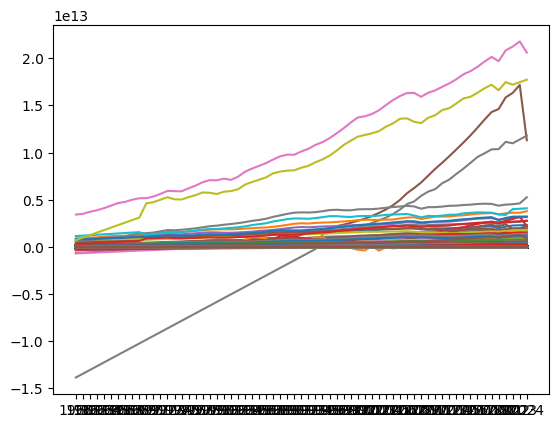

In [37]:
years = np.array(rows.columns.values)
missing_series = []
for row_i in range(0, rows.shape[0]):
    row = rows.iloc[row_i]
    values = row[years].values

    non_nan_indices = ~np.isnan(values)
    existing_years = years[non_nan_indices].reshape(-1, 1)
    existing_values = values[non_nan_indices]

    missing_indices = np.isnan(values)
    missing_years = years[missing_indices].reshape(-1, 1)

    if len(existing_years) > 1 and len(missing_years) > 0:
        model = LinearRegression()
        # model = make_pipeline(
        #     # StandardScaler(),
        #     RandomForestRegressor(n_estimators=30, max_depth=10)
        # )
        model.fit(existing_years, existing_values)

        predicted_values = model.predict(missing_years)
        missing_years.flatten()

        rows.loc[row_i, years[missing_indices]] = predicted_values

        plt.plot(rows.loc[row_i])

    else:
        missing_series.append(economicData.iloc[row_i]['Series'])

    economicData.iloc[row_i, 1:-1] = rows.iloc[row_i]

In [39]:
economicData[economicData['noc'] == 'CAN']
# must drop SI.POV.NAHC series for all countries

,Series,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,noc
560,NY.GDP.MKTP.KD,2.763856e+11,2.851285e+11,3.063074e+11,3.225338e+11,3.440017e+11,3.657330e+11,3.904554e+11,4.024245e+11,4.225790e+11,...,1.572674e+12,1.620386e+12,1.664833e+12,1.696605e+12,1.611126e+12,1.696306e+12,1.761102e+12,1.779876e+12,1.743957e+12,CAN
561,NY.GDP.MKTP.KD.ZG,4.939526e+00,3.163292e+00,7.427837e+00,5.297440e+00,6.656000e+00,6.317200e+00,6.759690e+00,3.065421e+00,5.008274e+00,...,1.038551e+00,3.033835e+00,2.742963e+00,1.908432e+00,-5.038233e+00,5.286957e+00,3.819866e+00,1.065994e+00,1.115198e+00,CAN
562,EG.ELC.ACCS.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,CAN
563,EG.CFT.ACCS.ZS,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,CAN
564,SP.POP.GROW,1.558886e+00,1.999185e+00,1.859888e+00,1.862846e+00,1.885715e+00,1.810167e+00,1.862814e+00,1.799357e+00,1.613409e+00,...,1.131540e+00,1.195436e+00,1.433226e+00,1.461713e+00,1.084369e+00,5.539024e-01,1.811923e+00,2.932274e+00,9.998359e-01,CAN
565,EN.POP.DNST,2.011990e+00,2.037903e+00,2.076160e+00,2.115198e+00,2.155463e+00,2.194836e+00,2.236105e+00,2.276705e+00,2.313735e+00,...,4.027711e+00,4.076148e+00,4.134989e+00,4.195875e+00,4.241621e+00,4.351026e+00,4.242546e+00,4.278523e+00,4.314499e+00,CAN
566,SP.POP.TOTL,1.790936e+07,1.827100e+07,1.861400e+07,1.896400e+07,1.932500e+07,1.967800e+07,2.004800e+07,2.041200e+07,2.074400e+07,...,3.611080e+07,3.654508e+07,3.707262e+07,3.761850e+07,3.802864e+07,3.823986e+07,3.893906e+07,4.009776e+07,3.880394e+07,CAN
567,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAN
568,AG.LND.TOTL.K2,8.971390e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,...,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.965590e+06,8.788700e+06,8.953991e+06,8.953710e+06,8.953429e+06,CAN
569,SN.ITK.MSFI.ZS,-3.410000e+01,-3.342000e+01,-3.274000e+01,-3.206000e+01,-3.138000e+01,-3.070000e+01,-3.002000e+01,-2.934000e+01,-2.866000e+01,...,3.980000e+00,5.000000e+00,5.100000e+00,5.800000e+00,6.500000e+00,7.700000e+00,8.060000e+00,8.740000e+00,9.420000e+00,CAN


In [40]:
economicData[economicData['Series'] == 'SI.POV.NAHC']

,Series,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,noc
7,SI.POV.NAHC,-78.424590,-76.075410,-73.726230,-71.377049,-69.027869,-66.678689,-64.329508,-61.980328,-59.631148,...,54.500000,55.478689,57.827869,60.177049,62.526230,64.875410,67.224590,69.573770,71.922951,AFG
23,SI.POV.NAHC,11.186705,11.362428,11.538150,11.713873,11.889595,12.065318,12.241040,12.416763,12.592486,...,23.700000,23.400000,23.000000,21.800000,22.000000,21.905780,22.081503,22.257225,22.432948,ALB
39,SI.POV.NAHC,29.603837,29.178297,28.752758,28.327218,27.901679,27.476139,27.050600,26.625060,26.199520,...,5.773621,5.348082,4.922542,4.497002,4.071463,3.645923,3.220384,2.794844,2.369305,ALG
55,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASA
71,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3415,SI.POV.NAHC,-5.259677,-4.645161,-4.030645,-3.416129,-2.801613,-2.187097,-1.572581,-0.958065,-0.343548,...,29.200000,29.767742,30.382258,30.996774,31.611290,32.225806,32.840323,33.454839,34.069355,NaN
3431,SI.POV.NAHC,14.772280,15.350259,15.928238,16.506218,17.084197,17.662176,18.240155,18.818135,19.396114,...,47.139119,47.717098,48.295078,48.873057,49.451036,50.029016,50.606995,51.184974,51.762953,NaN
3447,SI.POV.NAHC,86.655905,86.123733,85.591561,85.059390,84.527218,83.995046,83.462874,82.930703,82.398531,...,56.854288,56.322116,55.789944,55.257772,54.725601,54.193429,60.000000,53.129086,52.596914,ZAM


In [41]:
NAHC_indices = economicData[economicData['Series'] == "SI.POV.NAHC"].index
economicData = economicData.drop(NAHC_indices)
economicData

,Series,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,noc
0,NY.GDP.MKTP.KD,-2.150513e+10,-2.080541e+10,-2.010569e+10,-1.940596e+10,-1.870624e+10,-1.800651e+10,-1.730679e+10,-1.660707e+10,-1.590734e+10,...,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,1.532523e+10,2.257746e+10,2.327719e+10,AFG
1,NY.GDP.MKTP.KD.ZG,4.575161e+01,4.495426e+01,4.415691e+01,4.335956e+01,4.256221e+01,4.176486e+01,4.096751e+01,4.017016e+01,3.937282e+01,...,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,-2.073884e+01,-6.240172e+00,-4.481371e+00,-5.278720e+00,AFG
2,EG.ELC.ACCS.ZS,-1.806534e+02,-1.759917e+02,-1.713300e+02,-1.666684e+02,-1.620067e+02,-1.573451e+02,-1.526834e+02,-1.480217e+02,-1.433601e+02,...,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,1.130312e+02,1.176929e+02,AFG
3,EG.CFT.ACCS.ZS,-5.301858e+01,-5.156561e+01,-5.011265e+01,-4.865968e+01,-4.720672e+01,-4.575375e+01,-4.430079e+01,-4.284783e+01,-4.139486e+01,...,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,3.851818e+01,3.997115e+01,AFG
4,SP.POP.GROW,1.061130e+00,1.925952e+00,2.014879e+00,2.078997e+00,2.139651e+00,2.216007e+00,2.253524e+00,2.292638e+00,2.347351e+00,...,2.581549e+00,2.866492e+00,2.885208e+00,2.908529e+00,3.134747e+00,2.851358e+00,2.534498e+00,2.665628e+00,3.983292e+00,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
missing_series = np.unique(
    np.array(economicData[economicData.isna().any(axis=1)]["noc"]).astype(str))
missing_series

array(['AFG', 'AND', 'ANT', 'ARU', 'ASA', 'AUS', 'AZE', 'BAR', 'BDI',
       'BER', 'BHU', 'BLR', 'BOL', 'BRN', 'BRU', 'BUL', 'CAY', 'CHA',
       'COL', 'CUB', 'CYP', 'DMA', 'ERI', 'FIJ', 'GAB', 'GEQ', 'GRN',
       'GUM', 'GUY', 'IND', 'IRQ', 'IVB', 'JOR', 'KIR', 'KOS', 'LBA',
       'LBN', 'LBR', 'LIE', 'MAR', 'MAW', 'MDV', 'MHL', 'MLI', 'MLT',
       'MON', 'MYA', 'NCA', 'NGR', 'NRU', 'OMA', 'PAN', 'PER', 'PLW',
       'PNG', 'PUR', 'QAT', 'RWA', 'SEY', 'SGP', 'SMR', 'SOL', 'SOM',
       'SUD', 'SUR', 'SYR', 'THA', 'TJK', 'TKM', 'TLS', 'TTO', 'TUV',
       'UZB', 'ZAM', 'nan'], dtype='<U3')

In [43]:
mask = economicData['noc'].isin(missing_series)
economicData.dropna()

,Series,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,noc
0,NY.GDP.MKTP.KD,-2.150513e+10,-2.080541e+10,-2.010569e+10,-1.940596e+10,-1.870624e+10,-1.800651e+10,-1.730679e+10,-1.660707e+10,-1.590734e+10,...,1.956672e+10,2.008465e+10,2.032350e+10,2.111847e+10,2.062196e+10,1.634520e+10,1.532523e+10,2.257746e+10,2.327719e+10,AFG
1,NY.GDP.MKTP.KD.ZG,4.575161e+01,4.495426e+01,4.415691e+01,4.335956e+01,4.256221e+01,4.176486e+01,4.096751e+01,4.017016e+01,3.937282e+01,...,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,-2.073884e+01,-6.240172e+00,-4.481371e+00,-5.278720e+00,AFG
2,EG.ELC.ACCS.ZS,-1.806534e+02,-1.759917e+02,-1.713300e+02,-1.666684e+02,-1.620067e+02,-1.573451e+02,-1.526834e+02,-1.480217e+02,-1.433601e+02,...,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01,9.770000e+01,8.530000e+01,1.130312e+02,1.176929e+02,AFG
3,EG.CFT.ACCS.ZS,-5.301858e+01,-5.156561e+01,-5.011265e+01,-4.865968e+01,-4.720672e+01,-4.575375e+01,-4.430079e+01,-4.284783e+01,-4.139486e+01,...,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01,3.490000e+01,3.610000e+01,3.851818e+01,3.997115e+01,AFG
4,SP.POP.GROW,1.061130e+00,1.925952e+00,2.014879e+00,2.078997e+00,2.139651e+00,2.216007e+00,2.253524e+00,2.292638e+00,2.347351e+00,...,2.581549e+00,2.866492e+00,2.885208e+00,2.908529e+00,3.134747e+00,2.851358e+00,2.534498e+00,2.665628e+00,3.983292e+00,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,NY.GDP.PCAP.KD.ZG,1.484089e+00,3.076210e+00,-1.666989e+00,2.985427e+00,-4.143906e+00,1.682986e+00,-1.604962e+00,5.021605e+00,-1.194617e+00,...,-1.177893e+00,1.974846e+00,2.909395e+00,-8.177320e+00,-9.670405e+00,6.271613e+00,4.387997e+00,2.783839e+00,-3.614132e-01,ZIM
3468,NY.GDP.DEFL.KD.ZG,-6.363735e+01,-2.041300e+00,4.696178e-01,-2.347740e+00,6.144012e+00,2.704143e+00,-3.729967e+00,5.765617e-01,3.866207e+00,...,2.014095e+00,3.056905e+00,2.007696e+02,2.253946e+02,6.049459e+02,1.132950e+02,2.645806e+02,8.604988e+02,1.418955e+02,ZIM
3469,NY.ADJ.NNTY.KD,-2.867420e+10,-2.788785e+10,-2.710150e+10,-2.631515e+10,-2.552880e+10,-2.474245e+10,-2.395610e+10,-2.316976e+10,-2.238341e+10,...,1.520712e+10,1.590361e+10,1.994242e+10,1.841870e+10,1.662388e+10,1.775851e+10,2.007946e+10,2.086581e+10,2.165216e+10,ZIM
3470,SH.XPD.CHEX.GD.ZS,4.006639e+01,3.945806e+01,3.884972e+01,3.824139e+01,3.763305e+01,3.702472e+01,3.641638e+01,3.580805e+01,3.519971e+01,...,7.466447e+00,6.363583e+00,4.670392e+00,3.232802e+00,2.954401e+00,2.789751e+00,2.349618e+00,1.741283e+00,1.132947e+00,ZIM
